### 데이터 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./train_santander.csv", encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
print(cust_df['TARGET'].value_counts())

unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1]['TARGET'].count()
total_cnt = cust_df['TARGET'].count()

print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [4]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
print(cust_df['var3'].value_counts()[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [6]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트 분리. 레이블 컬럼은 DataFrame 의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape: {0}'.format(X_features.shape))

피처 데이터 shape: (76020, 369)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

# train set 분포와 test set 분포를 더 정확하게 비슷하게 만들고 싶으면, train_test_split 에서 stratify=y_labels 라고 하면 된다.

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state 는 예제 수행 시마다 동일 예측 결과를 위해 설정
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

C:\Users\jiinkim\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85830	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88072	validation_1-auc:0.84117
[16]	validation_0-auc:0.88237	validation_1-auc:0.84101
[17]	validation_0-auc:0.88352	validation_1-auc:0.84071
[18]	validation_0-au

In [9]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators 를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5,0.75]}

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않음.
gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

C:\Users\jiinkim\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80038	validation_1-auc:0.79818
[1]	validation_0-auc:0.81995	validation_1-auc:0.81649
[2]	validation_0-auc:0.82649	validation_1-auc:0.82081
[3]	validation_0-auc:0.83183	validation_1-auc:0.82450
[4]	validation_0-auc:0.83650	validation_1-auc:0.82830
[5]	validation_0-auc:0.83943	validation_1-auc:0.83588
[6]	validation_0-auc:0.83793	validation_1-auc:0.83169
[7]	validation_0-auc:0.84466	validation_1-auc:0.83748
[8]	validation_0-auc:0.84785	validation_1-auc:0.83735
[9]	validation_0-auc:0.84684	validation_1-auc:0.83529
[10]	validation_0-auc:0.84625	validation_1-auc:0.83278
[11]	validation_0-auc:0.84769	validation_1-auc:0.83157
[12]	validation_0-auc:0.85326	validation_1-auc:0.83573
[13]	validation_0-auc:0.85730	validation_1-auc:0.83839
[14]	validation_0-auc:0.85934	validation_1-auc:0.83892
[15]	validation_0-auc:0.86089	validation_1-auc:0.83844
[16]	validation_0-auc:0.86256	validation_1-auc:0.83932
[17]	validation_0-auc:0.86398	validation_1-auc:0.83871
[18]	validation_0-au

[15]	validation_0-auc:0.86262	validation_1-auc:0.84069
[16]	validation_0-auc:0.86438	validation_1-auc:0.84129
[17]	validation_0-auc:0.86582	validation_1-auc:0.84054
[18]	validation_0-auc:0.86660	validation_1-auc:0.84019
[19]	validation_0-auc:0.86816	validation_1-auc:0.83925
[20]	validation_0-auc:0.86872	validation_1-auc:0.83902
[21]	validation_0-auc:0.86926	validation_1-auc:0.83853
[22]	validation_0-auc:0.87020	validation_1-auc:0.83887
[23]	validation_0-auc:0.87138	validation_1-auc:0.83898
[24]	validation_0-auc:0.87192	validation_1-auc:0.83943
[25]	validation_0-auc:0.87267	validation_1-auc:0.83958
[26]	validation_0-auc:0.87390	validation_1-auc:0.83941
[27]	validation_0-auc:0.87466	validation_1-auc:0.83954
[28]	validation_0-auc:0.87477	validation_1-auc:0.83958
[29]	validation_0-auc:0.87518	validation_1-auc:0.83951
[30]	validation_0-auc:0.87583	validation_1-auc:0.83913
[31]	validation_0-auc:0.87665	validation_1-auc:0.83859
[32]	validation_0-auc:0.87711	validation_1-auc:0.83895
[33]	valid

[15]	validation_0-auc:0.86035	validation_1-auc:0.84141
[16]	validation_0-auc:0.86170	validation_1-auc:0.84277
[17]	validation_0-auc:0.86261	validation_1-auc:0.84241
[18]	validation_0-auc:0.86332	validation_1-auc:0.84189
[19]	validation_0-auc:0.86468	validation_1-auc:0.84155
[20]	validation_0-auc:0.86554	validation_1-auc:0.84142
[21]	validation_0-auc:0.86602	validation_1-auc:0.84093
[22]	validation_0-auc:0.86679	validation_1-auc:0.84153
[23]	validation_0-auc:0.86744	validation_1-auc:0.84176
[24]	validation_0-auc:0.86781	validation_1-auc:0.84101
[25]	validation_0-auc:0.86901	validation_1-auc:0.84009
[26]	validation_0-auc:0.87031	validation_1-auc:0.84028
[27]	validation_0-auc:0.87125	validation_1-auc:0.84040
[28]	validation_0-auc:0.87151	validation_1-auc:0.84015
[29]	validation_0-auc:0.87236	validation_1-auc:0.83980
[30]	validation_0-auc:0.87280	validation_1-auc:0.83951
[31]	validation_0-auc:0.87337	validation_1-auc:0.83966
[32]	validation_0-auc:0.87373	validation_1-auc:0.83976
[33]	valid

[19]	validation_0-auc:0.86509	validation_1-auc:0.84225
[20]	validation_0-auc:0.86583	validation_1-auc:0.84202
[21]	validation_0-auc:0.86649	validation_1-auc:0.84154
[22]	validation_0-auc:0.86789	validation_1-auc:0.84130
[23]	validation_0-auc:0.86875	validation_1-auc:0.84070
[24]	validation_0-auc:0.86963	validation_1-auc:0.84129
[25]	validation_0-auc:0.87029	validation_1-auc:0.84082
[26]	validation_0-auc:0.87152	validation_1-auc:0.83990
[27]	validation_0-auc:0.87202	validation_1-auc:0.83942
[28]	validation_0-auc:0.87225	validation_1-auc:0.83959
[29]	validation_0-auc:0.87310	validation_1-auc:0.83948
[30]	validation_0-auc:0.87336	validation_1-auc:0.83930
[31]	validation_0-auc:0.87396	validation_1-auc:0.83927
[32]	validation_0-auc:0.87499	validation_1-auc:0.83895
[33]	validation_0-auc:0.87511	validation_1-auc:0.83896
[34]	validation_0-auc:0.87595	validation_1-auc:0.83959
[35]	validation_0-auc:0.87700	validation_1-auc:0.83873
[36]	validation_0-auc:0.87751	validation_1-auc:0.83886
[37]	valid

[27]	validation_0-auc:0.89849	validation_1-auc:0.83885
[28]	validation_0-auc:0.89880	validation_1-auc:0.83913
[29]	validation_0-auc:0.89981	validation_1-auc:0.83865
[30]	validation_0-auc:0.90069	validation_1-auc:0.83884
[31]	validation_0-auc:0.90132	validation_1-auc:0.83787
[32]	validation_0-auc:0.90165	validation_1-auc:0.83734
[33]	validation_0-auc:0.90202	validation_1-auc:0.83749
[34]	validation_0-auc:0.90287	validation_1-auc:0.83740
[35]	validation_0-auc:0.90325	validation_1-auc:0.83765
[36]	validation_0-auc:0.90351	validation_1-auc:0.83767
[37]	validation_0-auc:0.90373	validation_1-auc:0.83737
[38]	validation_0-auc:0.90389	validation_1-auc:0.83727
[39]	validation_0-auc:0.90420	validation_1-auc:0.83715
[40]	validation_0-auc:0.90430	validation_1-auc:0.83716
[41]	validation_0-auc:0.90535	validation_1-auc:0.83669
[42]	validation_0-auc:0.90598	validation_1-auc:0.83662
[43]	validation_0-auc:0.90643	validation_1-auc:0.83646
[0]	validation_0-auc:0.82030	validation_1-auc:0.81629
[1]	validat

[41]	validation_0-auc:0.89623	validation_1-auc:0.83571
[42]	validation_0-auc:0.89673	validation_1-auc:0.83590
[43]	validation_0-auc:0.89700	validation_1-auc:0.83579
[0]	validation_0-auc:0.81707	validation_1-auc:0.81668
[1]	validation_0-auc:0.83059	validation_1-auc:0.82461
[2]	validation_0-auc:0.83731	validation_1-auc:0.82740
[3]	validation_0-auc:0.84251	validation_1-auc:0.82901
[4]	validation_0-auc:0.84709	validation_1-auc:0.82948
[5]	validation_0-auc:0.85009	validation_1-auc:0.83382
[6]	validation_0-auc:0.85057	validation_1-auc:0.82627
[7]	validation_0-auc:0.85827	validation_1-auc:0.83007
[8]	validation_0-auc:0.86455	validation_1-auc:0.83361
[9]	validation_0-auc:0.86340	validation_1-auc:0.83205
[10]	validation_0-auc:0.86263	validation_1-auc:0.83078
[11]	validation_0-auc:0.86316	validation_1-auc:0.82911
[12]	validation_0-auc:0.86958	validation_1-auc:0.83375
[13]	validation_0-auc:0.87384	validation_1-auc:0.83608
[14]	validation_0-auc:0.87670	validation_1-auc:0.83822
[15]	validation_0-au

[3]	validation_0-auc:0.84430	validation_1-auc:0.82981
[4]	validation_0-auc:0.84814	validation_1-auc:0.83158
[5]	validation_0-auc:0.85204	validation_1-auc:0.83567
[6]	validation_0-auc:0.85209	validation_1-auc:0.83069
[7]	validation_0-auc:0.86086	validation_1-auc:0.83681
[8]	validation_0-auc:0.86762	validation_1-auc:0.83791
[9]	validation_0-auc:0.86651	validation_1-auc:0.83835
[10]	validation_0-auc:0.86632	validation_1-auc:0.83648
[11]	validation_0-auc:0.86635	validation_1-auc:0.83540
[12]	validation_0-auc:0.87323	validation_1-auc:0.83879
[13]	validation_0-auc:0.87674	validation_1-auc:0.84000
[14]	validation_0-auc:0.87881	validation_1-auc:0.84150
[15]	validation_0-auc:0.88009	validation_1-auc:0.84063
[16]	validation_0-auc:0.88204	validation_1-auc:0.84153
[17]	validation_0-auc:0.88346	validation_1-auc:0.84109
[18]	validation_0-auc:0.88420	validation_1-auc:0.84169
[19]	validation_0-auc:0.88585	validation_1-auc:0.84125
[20]	validation_0-auc:0.88654	validation_1-auc:0.84099
[21]	validation_0

[6]	validation_0-auc:0.84450	validation_1-auc:0.83395
[7]	validation_0-auc:0.84723	validation_1-auc:0.83554
[8]	validation_0-auc:0.84879	validation_1-auc:0.83601
[9]	validation_0-auc:0.85137	validation_1-auc:0.84014
[10]	validation_0-auc:0.85217	validation_1-auc:0.83916
[11]	validation_0-auc:0.85200	validation_1-auc:0.83724
[12]	validation_0-auc:0.85661	validation_1-auc:0.83892
[13]	validation_0-auc:0.86007	validation_1-auc:0.84146
[14]	validation_0-auc:0.86206	validation_1-auc:0.84135
[15]	validation_0-auc:0.86440	validation_1-auc:0.84157
[16]	validation_0-auc:0.86560	validation_1-auc:0.84169
[17]	validation_0-auc:0.86681	validation_1-auc:0.84139
[18]	validation_0-auc:0.86739	validation_1-auc:0.84111
[19]	validation_0-auc:0.86874	validation_1-auc:0.84064
[20]	validation_0-auc:0.86966	validation_1-auc:0.84041
[21]	validation_0-auc:0.87071	validation_1-auc:0.83990
[22]	validation_0-auc:0.87179	validation_1-auc:0.83893
[23]	validation_0-auc:0.87304	validation_1-auc:0.83900
[24]	validatio

[22]	validation_0-auc:0.86806	validation_1-auc:0.83779
[23]	validation_0-auc:0.86850	validation_1-auc:0.83750
[24]	validation_0-auc:0.87022	validation_1-auc:0.83677
[25]	validation_0-auc:0.87042	validation_1-auc:0.83707
[26]	validation_0-auc:0.87080	validation_1-auc:0.83697
[27]	validation_0-auc:0.87118	validation_1-auc:0.83686
[28]	validation_0-auc:0.87255	validation_1-auc:0.83661
[29]	validation_0-auc:0.87276	validation_1-auc:0.83686
[30]	validation_0-auc:0.87302	validation_1-auc:0.83694
[31]	validation_0-auc:0.87365	validation_1-auc:0.83649
[32]	validation_0-auc:0.87422	validation_1-auc:0.83628
[33]	validation_0-auc:0.87448	validation_1-auc:0.83619
[34]	validation_0-auc:0.87487	validation_1-auc:0.83614
[35]	validation_0-auc:0.87491	validation_1-auc:0.83610
[36]	validation_0-auc:0.87506	validation_1-auc:0.83601
[37]	validation_0-auc:0.87634	validation_1-auc:0.83629
[38]	validation_0-auc:0.87671	validation_1-auc:0.83625
[39]	validation_0-auc:0.87679	validation_1-auc:0.83635
[40]	valid

[37]	validation_0-auc:0.87179	validation_1-auc:0.83847
[38]	validation_0-auc:0.87209	validation_1-auc:0.83799
[39]	validation_0-auc:0.87234	validation_1-auc:0.83813
[40]	validation_0-auc:0.87299	validation_1-auc:0.83772
[41]	validation_0-auc:0.87301	validation_1-auc:0.83779
[42]	validation_0-auc:0.87347	validation_1-auc:0.83801
[43]	validation_0-auc:0.87413	validation_1-auc:0.83806
[44]	validation_0-auc:0.87437	validation_1-auc:0.83775
[45]	validation_0-auc:0.87449	validation_1-auc:0.83769
[46]	validation_0-auc:0.87566	validation_1-auc:0.83731
[47]	validation_0-auc:0.87629	validation_1-auc:0.83738
[0]	validation_0-auc:0.81985	validation_1-auc:0.81459
[1]	validation_0-auc:0.82656	validation_1-auc:0.82093
[2]	validation_0-auc:0.83133	validation_1-auc:0.82408
[3]	validation_0-auc:0.83445	validation_1-auc:0.82663
[4]	validation_0-auc:0.83803	validation_1-auc:0.82830
[5]	validation_0-auc:0.84362	validation_1-auc:0.83190
[6]	validation_0-auc:0.84552	validation_1-auc:0.83366
[7]	validation_0-

[1]	validation_0-auc:0.83356	validation_1-auc:0.81904
[2]	validation_0-auc:0.83930	validation_1-auc:0.82372
[3]	validation_0-auc:0.84568	validation_1-auc:0.83061
[4]	validation_0-auc:0.85124	validation_1-auc:0.82996
[5]	validation_0-auc:0.85564	validation_1-auc:0.83677
[6]	validation_0-auc:0.86115	validation_1-auc:0.83678
[7]	validation_0-auc:0.86413	validation_1-auc:0.83719
[8]	validation_0-auc:0.86599	validation_1-auc:0.83728
[9]	validation_0-auc:0.86928	validation_1-auc:0.83872
[10]	validation_0-auc:0.87174	validation_1-auc:0.83869
[11]	validation_0-auc:0.87115	validation_1-auc:0.83684
[12]	validation_0-auc:0.87911	validation_1-auc:0.83800
[13]	validation_0-auc:0.88263	validation_1-auc:0.83817
[14]	validation_0-auc:0.88487	validation_1-auc:0.83946
[15]	validation_0-auc:0.88721	validation_1-auc:0.83726
[16]	validation_0-auc:0.89026	validation_1-auc:0.83736
[17]	validation_0-auc:0.89140	validation_1-auc:0.83689
[18]	validation_0-auc:0.89265	validation_1-auc:0.83649
[19]	validation_0-a

[15]	validation_0-auc:0.88025	validation_1-auc:0.83769
[16]	validation_0-auc:0.88163	validation_1-auc:0.83737
[17]	validation_0-auc:0.88264	validation_1-auc:0.83675
[18]	validation_0-auc:0.88373	validation_1-auc:0.83573
[19]	validation_0-auc:0.88454	validation_1-auc:0.83592
[20]	validation_0-auc:0.88517	validation_1-auc:0.83543
[21]	validation_0-auc:0.88562	validation_1-auc:0.83571
[22]	validation_0-auc:0.88698	validation_1-auc:0.83520
[23]	validation_0-auc:0.88758	validation_1-auc:0.83538
[24]	validation_0-auc:0.88823	validation_1-auc:0.83571
[25]	validation_0-auc:0.88895	validation_1-auc:0.83561
[26]	validation_0-auc:0.89035	validation_1-auc:0.83511
[27]	validation_0-auc:0.89188	validation_1-auc:0.83444
[28]	validation_0-auc:0.89213	validation_1-auc:0.83430
[29]	validation_0-auc:0.89316	validation_1-auc:0.83369
[30]	validation_0-auc:0.89408	validation_1-auc:0.83262
[31]	validation_0-auc:0.89463	validation_1-auc:0.83154
[32]	validation_0-auc:0.89515	validation_1-auc:0.83160
[33]	valid

[38]	validation_0-auc:0.89564	validation_1-auc:0.83978
[39]	validation_0-auc:0.89578	validation_1-auc:0.83964
[40]	validation_0-auc:0.89641	validation_1-auc:0.83952
[41]	validation_0-auc:0.89649	validation_1-auc:0.83945
[42]	validation_0-auc:0.89663	validation_1-auc:0.83930
[43]	validation_0-auc:0.89678	validation_1-auc:0.83967
[44]	validation_0-auc:0.89721	validation_1-auc:0.83964
[45]	validation_0-auc:0.89822	validation_1-auc:0.83961
[46]	validation_0-auc:0.89862	validation_1-auc:0.83973
[0]	validation_0-auc:0.82505	validation_1-auc:0.81749
[1]	validation_0-auc:0.83539	validation_1-auc:0.82056
[2]	validation_0-auc:0.84105	validation_1-auc:0.82687
[3]	validation_0-auc:0.84639	validation_1-auc:0.82992
[4]	validation_0-auc:0.85173	validation_1-auc:0.83355
[5]	validation_0-auc:0.85342	validation_1-auc:0.83664
[6]	validation_0-auc:0.85822	validation_1-auc:0.83831
[7]	validation_0-auc:0.86311	validation_1-auc:0.83925
[8]	validation_0-auc:0.86680	validation_1-auc:0.83996
[9]	validation_0-au

In [13]:
# n_estimators는 100으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.3으로 추가함.
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=5, min_child_weight=1, colsample_bytree=0.5, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

C:\Users\jiinkim\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.72761	validation_1-auc:0.73342
[1]	validation_0-auc:0.80707	validation_1-auc:0.81061
[2]	validation_0-auc:0.80283	validation_1-auc:0.79841
[3]	validation_0-auc:0.80177	validation_1-auc:0.79798
[4]	validation_0-auc:0.80213	validation_1-auc:0.80004
[5]	validation_0-auc:0.81311	validation_1-auc:0.80887
[6]	validation_0-auc:0.81918	validation_1-auc:0.81730
[7]	validation_0-auc:0.82318	validation_1-auc:0.81950
[8]	validation_0-auc:0.82681	validation_1-auc:0.82382
[9]	validation_0-auc:0.82371	validation_1-auc:0.82019
[10]	validation_0-auc:0.82726	validation_1-auc:0.82287
[11]	validation_0-auc:0.82384	validation_1-auc:0.82065
[12]	validation_0-auc:0.82707	validation_1-auc:0.82359
[13]	validation_0-auc:0.82461	validation_1-auc:0.82161
[14]	validation_0-auc:0.82820	validation_1-auc:0.82473
[15]	validation_0-auc:0.82591	validation_1-auc:0.82297
[16]	validation_0-auc:0.82868	validation_1-auc:0.82531
[17]	validation_0-auc:0.82654	validation_1-auc:0.82333
[18]	validation_0-au

[149]	validation_0-auc:0.85294	validation_1-auc:0.83909
[150]	validation_0-auc:0.85290	validation_1-auc:0.83930
[151]	validation_0-auc:0.85329	validation_1-auc:0.83954
[152]	validation_0-auc:0.85364	validation_1-auc:0.83971
[153]	validation_0-auc:0.85394	validation_1-auc:0.83985
[154]	validation_0-auc:0.85393	validation_1-auc:0.83973
[155]	validation_0-auc:0.85401	validation_1-auc:0.83971
[156]	validation_0-auc:0.85392	validation_1-auc:0.83971
[157]	validation_0-auc:0.85428	validation_1-auc:0.84000
[158]	validation_0-auc:0.85461	validation_1-auc:0.84023
[159]	validation_0-auc:0.85469	validation_1-auc:0.84014
[160]	validation_0-auc:0.85462	validation_1-auc:0.83998
[161]	validation_0-auc:0.85461	validation_1-auc:0.83998
[162]	validation_0-auc:0.85473	validation_1-auc:0.83978
[163]	validation_0-auc:0.85481	validation_1-auc:0.83981
[164]	validation_0-auc:0.85533	validation_1-auc:0.83996
[165]	validation_0-auc:0.85530	validation_1-auc:0.83988
[166]	validation_0-auc:0.85534	validation_1-auc:

[296]	validation_0-auc:0.87361	validation_1-auc:0.84540
[297]	validation_0-auc:0.87379	validation_1-auc:0.84537
[298]	validation_0-auc:0.87382	validation_1-auc:0.84539
[299]	validation_0-auc:0.87393	validation_1-auc:0.84537
[300]	validation_0-auc:0.87400	validation_1-auc:0.84532
[301]	validation_0-auc:0.87410	validation_1-auc:0.84533
[302]	validation_0-auc:0.87412	validation_1-auc:0.84534
[303]	validation_0-auc:0.87423	validation_1-auc:0.84540
[304]	validation_0-auc:0.87429	validation_1-auc:0.84534
[305]	validation_0-auc:0.87436	validation_1-auc:0.84532
[306]	validation_0-auc:0.87440	validation_1-auc:0.84532
[307]	validation_0-auc:0.87445	validation_1-auc:0.84530
[308]	validation_0-auc:0.87453	validation_1-auc:0.84522
[309]	validation_0-auc:0.87460	validation_1-auc:0.84522
[310]	validation_0-auc:0.87468	validation_1-auc:0.84522
[311]	validation_0-auc:0.87481	validation_1-auc:0.84526
[312]	validation_0-auc:0.87488	validation_1-auc:0.84530
[313]	validation_0-auc:0.87495	validation_1-auc:

[443]	validation_0-auc:0.88265	validation_1-auc:0.84453
[444]	validation_0-auc:0.88268	validation_1-auc:0.84452
[445]	validation_0-auc:0.88278	validation_1-auc:0.84449
[446]	validation_0-auc:0.88283	validation_1-auc:0.84448
[447]	validation_0-auc:0.88284	validation_1-auc:0.84448
[448]	validation_0-auc:0.88286	validation_1-auc:0.84448
[449]	validation_0-auc:0.88289	validation_1-auc:0.84447
[450]	validation_0-auc:0.88298	validation_1-auc:0.84444
[451]	validation_0-auc:0.88305	validation_1-auc:0.84447
[452]	validation_0-auc:0.88312	validation_1-auc:0.84448
[453]	validation_0-auc:0.88317	validation_1-auc:0.84446
[454]	validation_0-auc:0.88322	validation_1-auc:0.84443
[455]	validation_0-auc:0.88324	validation_1-auc:0.84441
[456]	validation_0-auc:0.88326	validation_1-auc:0.84441
[457]	validation_0-auc:0.88331	validation_1-auc:0.84443
[458]	validation_0-auc:0.88337	validation_1-auc:0.84442
[459]	validation_0-auc:0.88343	validation_1-auc:0.84438
[460]	validation_0-auc:0.88345	validation_1-auc:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

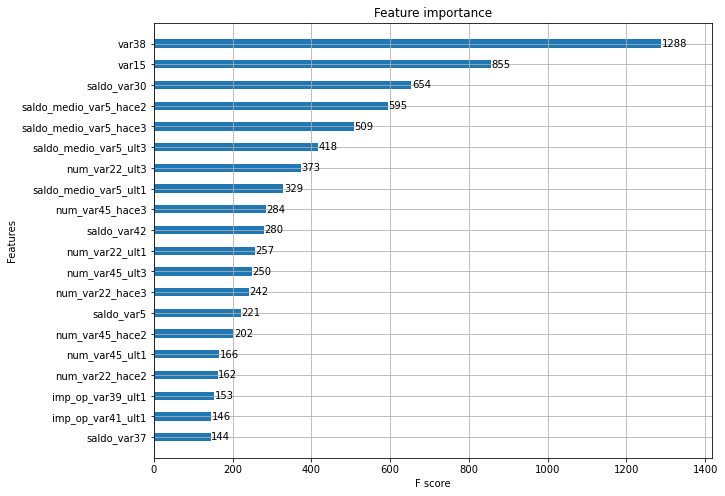

In [14]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [15]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC:{0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_loglos

In [16]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
LGBM_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64],
          'max_depth': [128, 160],
          'min_child_samples': [60, 100],
          'subsample': [0.8, 1]}

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv를 지정하지 않습니다.
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, -1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.823664	valid_0's binary_logloss: 0.156198	valid_1's auc: 0.821078	valid_1's binary_logloss: 0.16488
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82966	valid_0's binary_logloss: 0.150925	valid_1's auc: 0.826326	valid_1's binary_logloss: 0.159774
[3]	valid_0's auc: 0.834498	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826852	valid_1's binary_logloss: 0.156113
[4]	valid_0's auc: 0.83904	valid_0's binary_logloss: 0.144173	valid_1's auc: 0.831417	valid_1's binary_logloss: 0.153186
[5]	valid_0's auc: 0.841964	valid_0's binary_logloss: 0.141745	valid_1's auc: 0.834593	valid_1's binary_logloss: 0.150797
[6]	valid_0's auc: 0.845253	valid_0's binary_logloss: 0.139712	valid_1's auc: 0.836659	valid_1's binary_logloss: 0.149062
[7]	valid_0's auc: 0.846545	valid_0's binary_logloss: 0.138053	valid_1's auc: 0.836148	valid_1's binary_logloss: 0.147537
[8]	valid_0's auc: 0.848885	valid_0's binary_logloss: 0.1366	valid_1's auc: 0.838153	val

[34]	valid_0's auc: 0.880016	valid_0's binary_logloss: 0.12271	valid_1's auc: 0.836238	valid_1's binary_logloss: 0.140112
[35]	valid_0's auc: 0.880929	valid_0's binary_logloss: 0.122397	valid_1's auc: 0.836618	valid_1's binary_logloss: 0.140034
[36]	valid_0's auc: 0.881746	valid_0's binary_logloss: 0.122132	valid_1's auc: 0.836812	valid_1's binary_logloss: 0.140013
[37]	valid_0's auc: 0.882622	valid_0's binary_logloss: 0.121854	valid_1's auc: 0.836926	valid_1's binary_logloss: 0.139982
[38]	valid_0's auc: 0.883018	valid_0's binary_logloss: 0.121618	valid_1's auc: 0.836863	valid_1's binary_logloss: 0.139968
[39]	valid_0's auc: 0.883857	valid_0's binary_logloss: 0.12136	valid_1's auc: 0.837075	valid_1's binary_logloss: 0.139959
[40]	valid_0's auc: 0.884437	valid_0's binary_logloss: 0.121112	valid_1's auc: 0.836834	valid_1's binary_logloss: 0.139996
Early stopping, best iteration is:
[10]	valid_0's auc: 0.85489	valid_0's binary_logloss: 0.134153	valid_1's auc: 0.839913	valid_1's binary_lo

[19]	valid_0's auc: 0.86562	valid_0's binary_logloss: 0.12782	valid_1's auc: 0.839799	valid_1's binary_logloss: 0.140766
[20]	valid_0's auc: 0.866802	valid_0's binary_logloss: 0.127322	valid_1's auc: 0.839807	valid_1's binary_logloss: 0.140536
[21]	valid_0's auc: 0.868305	valid_0's binary_logloss: 0.126848	valid_1's auc: 0.839642	valid_1's binary_logloss: 0.140335
[22]	valid_0's auc: 0.869367	valid_0's binary_logloss: 0.126428	valid_1's auc: 0.839045	valid_1's binary_logloss: 0.140242
[23]	valid_0's auc: 0.870018	valid_0's binary_logloss: 0.126051	valid_1's auc: 0.838851	valid_1's binary_logloss: 0.140113
[24]	valid_0's auc: 0.871076	valid_0's binary_logloss: 0.125665	valid_1's auc: 0.838918	valid_1's binary_logloss: 0.139963
[25]	valid_0's auc: 0.871808	valid_0's binary_logloss: 0.12529	valid_1's auc: 0.838876	valid_1's binary_logloss: 0.139886
[26]	valid_0's auc: 0.872679	valid_0's binary_logloss: 0.124953	valid_1's auc: 0.838853	valid_1's binary_logloss: 0.139811
[27]	valid_0's auc:

[51]	valid_0's auc: 0.892736	valid_0's binary_logloss: 0.117984	valid_1's auc: 0.839121	valid_1's binary_logloss: 0.139524
[52]	valid_0's auc: 0.893171	valid_0's binary_logloss: 0.117764	valid_1's auc: 0.838794	valid_1's binary_logloss: 0.139586
[53]	valid_0's auc: 0.893573	valid_0's binary_logloss: 0.117568	valid_1's auc: 0.838694	valid_1's binary_logloss: 0.139581
[54]	valid_0's auc: 0.894147	valid_0's binary_logloss: 0.117322	valid_1's auc: 0.838487	valid_1's binary_logloss: 0.139606
[55]	valid_0's auc: 0.894518	valid_0's binary_logloss: 0.117157	valid_1's auc: 0.838831	valid_1's binary_logloss: 0.139538
[56]	valid_0's auc: 0.894919	valid_0's binary_logloss: 0.116983	valid_1's auc: 0.838866	valid_1's binary_logloss: 0.139562
[57]	valid_0's auc: 0.895096	valid_0's binary_logloss: 0.116832	valid_1's auc: 0.838982	valid_1's binary_logloss: 0.139544
[58]	valid_0's auc: 0.895448	valid_0's binary_logloss: 0.116643	valid_1's auc: 0.839062	valid_1's binary_logloss: 0.139518
[59]	valid_0's a

[18]	valid_0's auc: 0.864433	valid_0's binary_logloss: 0.128402	valid_1's auc: 0.835435	valid_1's binary_logloss: 0.141442
[19]	valid_0's auc: 0.865245	valid_0's binary_logloss: 0.127948	valid_1's auc: 0.836123	valid_1's binary_logloss: 0.1412
[20]	valid_0's auc: 0.866024	valid_0's binary_logloss: 0.127497	valid_1's auc: 0.83704	valid_1's binary_logloss: 0.140979
[21]	valid_0's auc: 0.867294	valid_0's binary_logloss: 0.12703	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.140825
[22]	valid_0's auc: 0.86828	valid_0's binary_logloss: 0.126598	valid_1's auc: 0.836515	valid_1's binary_logloss: 0.140741
[23]	valid_0's auc: 0.869182	valid_0's binary_logloss: 0.126269	valid_1's auc: 0.836587	valid_1's binary_logloss: 0.140588
[24]	valid_0's auc: 0.869979	valid_0's binary_logloss: 0.125886	valid_1's auc: 0.836766	valid_1's binary_logloss: 0.140496
[25]	valid_0's auc: 0.870956	valid_0's binary_logloss: 0.125545	valid_1's auc: 0.837001	valid_1's binary_logloss: 0.140322
[26]	valid_0's auc: 0

[18]	valid_0's auc: 0.864292	valid_0's binary_logloss: 0.128302	valid_1's auc: 0.839738	valid_1's binary_logloss: 0.140953
[19]	valid_0's auc: 0.86562	valid_0's binary_logloss: 0.12782	valid_1's auc: 0.839799	valid_1's binary_logloss: 0.140766
[20]	valid_0's auc: 0.866802	valid_0's binary_logloss: 0.127322	valid_1's auc: 0.839807	valid_1's binary_logloss: 0.140536
[21]	valid_0's auc: 0.868305	valid_0's binary_logloss: 0.126848	valid_1's auc: 0.839642	valid_1's binary_logloss: 0.140335
[22]	valid_0's auc: 0.869367	valid_0's binary_logloss: 0.126428	valid_1's auc: 0.839045	valid_1's binary_logloss: 0.140242
[23]	valid_0's auc: 0.870018	valid_0's binary_logloss: 0.126051	valid_1's auc: 0.838851	valid_1's binary_logloss: 0.140113
[24]	valid_0's auc: 0.871076	valid_0's binary_logloss: 0.125665	valid_1's auc: 0.838918	valid_1's binary_logloss: 0.139963
[25]	valid_0's auc: 0.871808	valid_0's binary_logloss: 0.12529	valid_1's auc: 0.838876	valid_1's binary_logloss: 0.139886
[26]	valid_0's auc:

[53]	valid_0's auc: 0.893573	valid_0's binary_logloss: 0.117568	valid_1's auc: 0.838694	valid_1's binary_logloss: 0.139581
[54]	valid_0's auc: 0.894147	valid_0's binary_logloss: 0.117322	valid_1's auc: 0.838487	valid_1's binary_logloss: 0.139606
[55]	valid_0's auc: 0.894518	valid_0's binary_logloss: 0.117157	valid_1's auc: 0.838831	valid_1's binary_logloss: 0.139538
[56]	valid_0's auc: 0.894919	valid_0's binary_logloss: 0.116983	valid_1's auc: 0.838866	valid_1's binary_logloss: 0.139562
[57]	valid_0's auc: 0.895096	valid_0's binary_logloss: 0.116832	valid_1's auc: 0.838982	valid_1's binary_logloss: 0.139544
[58]	valid_0's auc: 0.895448	valid_0's binary_logloss: 0.116643	valid_1's auc: 0.839062	valid_1's binary_logloss: 0.139518
[59]	valid_0's auc: 0.895699	valid_0's binary_logloss: 0.116514	valid_1's auc: 0.838981	valid_1's binary_logloss: 0.139543
[60]	valid_0's auc: 0.896178	valid_0's binary_logloss: 0.116313	valid_1's auc: 0.838833	valid_1's binary_logloss: 0.1396
Early stopping, be

[14]	valid_0's auc: 0.875949	valid_0's binary_logloss: 0.126455	valid_1's auc: 0.835276	valid_1's binary_logloss: 0.142607
[15]	valid_0's auc: 0.877382	valid_0's binary_logloss: 0.125645	valid_1's auc: 0.834312	valid_1's binary_logloss: 0.142362
[16]	valid_0's auc: 0.878987	valid_0's binary_logloss: 0.124805	valid_1's auc: 0.834644	valid_1's binary_logloss: 0.142102
[17]	valid_0's auc: 0.880532	valid_0's binary_logloss: 0.124054	valid_1's auc: 0.833893	valid_1's binary_logloss: 0.141884
[18]	valid_0's auc: 0.882045	valid_0's binary_logloss: 0.123344	valid_1's auc: 0.833575	valid_1's binary_logloss: 0.141697
[19]	valid_0's auc: 0.883566	valid_0's binary_logloss: 0.122594	valid_1's auc: 0.832707	valid_1's binary_logloss: 0.141615
[20]	valid_0's auc: 0.885585	valid_0's binary_logloss: 0.121869	valid_1's auc: 0.833151	valid_1's binary_logloss: 0.141426
[21]	valid_0's auc: 0.887553	valid_0's binary_logloss: 0.121164	valid_1's auc: 0.834052	valid_1's binary_logloss: 0.141225
[22]	valid_0's a

[1]	valid_0's auc: 0.830163	valid_0's binary_logloss: 0.155383	valid_1's auc: 0.817444	valid_1's binary_logloss: 0.164924
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.840688	valid_0's binary_logloss: 0.14972	valid_1's auc: 0.825893	valid_1's binary_logloss: 0.159538
[3]	valid_0's auc: 0.847811	valid_0's binary_logloss: 0.145576	valid_1's auc: 0.832086	valid_1's binary_logloss: 0.155889
[4]	valid_0's auc: 0.85262	valid_0's binary_logloss: 0.142266	valid_1's auc: 0.83348	valid_1's binary_logloss: 0.153059
[5]	valid_0's auc: 0.856853	valid_0's binary_logloss: 0.139575	valid_1's auc: 0.837158	valid_1's binary_logloss: 0.150847
[6]	valid_0's auc: 0.859779	valid_0's binary_logloss: 0.13732	valid_1's auc: 0.839471	valid_1's binary_logloss: 0.148924
[7]	valid_0's auc: 0.861819	valid_0's binary_logloss: 0.135402	valid_1's auc: 0.838324	valid_1's binary_logloss: 0.147505
[8]	valid_0's auc: 0.863714	valid_0's binary_logloss: 0.133757	valid_1's auc: 0.838679	va

[25]	valid_0's auc: 0.892959	valid_0's binary_logloss: 0.118644	valid_1's auc: 0.840779	valid_1's binary_logloss: 0.139336
[26]	valid_0's auc: 0.894356	valid_0's binary_logloss: 0.118128	valid_1's auc: 0.841299	valid_1's binary_logloss: 0.139198
[27]	valid_0's auc: 0.895981	valid_0's binary_logloss: 0.117575	valid_1's auc: 0.8407	valid_1's binary_logloss: 0.139192
[28]	valid_0's auc: 0.896969	valid_0's binary_logloss: 0.11709	valid_1's auc: 0.840437	valid_1's binary_logloss: 0.139222
[29]	valid_0's auc: 0.898028	valid_0's binary_logloss: 0.116618	valid_1's auc: 0.840857	valid_1's binary_logloss: 0.139136
[30]	valid_0's auc: 0.89908	valid_0's binary_logloss: 0.116142	valid_1's auc: 0.840827	valid_1's binary_logloss: 0.139074
[31]	valid_0's auc: 0.900145	valid_0's binary_logloss: 0.115699	valid_1's auc: 0.840974	valid_1's binary_logloss: 0.138987
[32]	valid_0's auc: 0.90112	valid_0's binary_logloss: 0.115215	valid_1's auc: 0.840942	valid_1's binary_logloss: 0.139024
[33]	valid_0's auc: 0

[1]	valid_0's auc: 0.832082	valid_0's binary_logloss: 0.155469	valid_1's auc: 0.814834	valid_1's binary_logloss: 0.164811
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.840358	valid_0's binary_logloss: 0.149705	valid_1's auc: 0.821	valid_1's binary_logloss: 0.159739
[3]	valid_0's auc: 0.846958	valid_0's binary_logloss: 0.145462	valid_1's auc: 0.829037	valid_1's binary_logloss: 0.155963
[4]	valid_0's auc: 0.850608	valid_0's binary_logloss: 0.142192	valid_1's auc: 0.830664	valid_1's binary_logloss: 0.153305
[5]	valid_0's auc: 0.857054	valid_0's binary_logloss: 0.139496	valid_1's auc: 0.834255	valid_1's binary_logloss: 0.150999
[6]	valid_0's auc: 0.860917	valid_0's binary_logloss: 0.137183	valid_1's auc: 0.837251	valid_1's binary_logloss: 0.149102
[7]	valid_0's auc: 0.862765	valid_0's binary_logloss: 0.135234	valid_1's auc: 0.838397	valid_1's binary_logloss: 0.14754
[8]	valid_0's auc: 0.865325	valid_0's binary_logloss: 0.133564	valid_1's auc: 0.83904	val

[38]	valid_0's auc: 0.906535	valid_0's binary_logloss: 0.11295	valid_1's auc: 0.836328	valid_1's binary_logloss: 0.139575
[39]	valid_0's auc: 0.907125	valid_0's binary_logloss: 0.112599	valid_1's auc: 0.83631	valid_1's binary_logloss: 0.139598
[40]	valid_0's auc: 0.908267	valid_0's binary_logloss: 0.112224	valid_1's auc: 0.836096	valid_1's binary_logloss: 0.139675
[41]	valid_0's auc: 0.908916	valid_0's binary_logloss: 0.111848	valid_1's auc: 0.835954	valid_1's binary_logloss: 0.139752
Early stopping, best iteration is:
[11]	valid_0's auc: 0.871178	valid_0's binary_logloss: 0.129289	valid_1's auc: 0.839056	valid_1's binary_logloss: 0.142856
[1]	valid_0's auc: 0.830163	valid_0's binary_logloss: 0.155383	valid_1's auc: 0.817444	valid_1's binary_logloss: 0.164924
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.840688	valid_0's binary_logloss: 0.14972	valid_1's auc: 0.825893	valid_1's binary_logloss: 0.159538
[3]	valid_0's auc: 0.847811	valid_0's binary_log

[15]	valid_0's auc: 0.880521	valid_0's binary_logloss: 0.125283	valid_1's auc: 0.841423	valid_1's binary_logloss: 0.141157
[16]	valid_0's auc: 0.882066	valid_0's binary_logloss: 0.1244	valid_1's auc: 0.841461	valid_1's binary_logloss: 0.140813
[17]	valid_0's auc: 0.883582	valid_0's binary_logloss: 0.123652	valid_1's auc: 0.841626	valid_1's binary_logloss: 0.1405
[18]	valid_0's auc: 0.884494	valid_0's binary_logloss: 0.122936	valid_1's auc: 0.841739	valid_1's binary_logloss: 0.140193
[19]	valid_0's auc: 0.885618	valid_0's binary_logloss: 0.122288	valid_1's auc: 0.841595	valid_1's binary_logloss: 0.140038
[20]	valid_0's auc: 0.887262	valid_0's binary_logloss: 0.12156	valid_1's auc: 0.841475	valid_1's binary_logloss: 0.13984
[21]	valid_0's auc: 0.888549	valid_0's binary_logloss: 0.120864	valid_1's auc: 0.841698	valid_1's binary_logloss: 0.139644
[22]	valid_0's auc: 0.889783	valid_0's binary_logloss: 0.120226	valid_1's auc: 0.841265	valid_1's binary_logloss: 0.139524
[23]	valid_0's auc: 0.

[35]	valid_0's auc: 0.879757	valid_0's binary_logloss: 0.122828	valid_1's auc: 0.835337	valid_1's binary_logloss: 0.139761
[36]	valid_0's auc: 0.880504	valid_0's binary_logloss: 0.122572	valid_1's auc: 0.835128	valid_1's binary_logloss: 0.139792
[37]	valid_0's auc: 0.881015	valid_0's binary_logloss: 0.122349	valid_1's auc: 0.83506	valid_1's binary_logloss: 0.139809
[38]	valid_0's auc: 0.881565	valid_0's binary_logloss: 0.122148	valid_1's auc: 0.835127	valid_1's binary_logloss: 0.139772
[39]	valid_0's auc: 0.882176	valid_0's binary_logloss: 0.121925	valid_1's auc: 0.835186	valid_1's binary_logloss: 0.13977
[40]	valid_0's auc: 0.882818	valid_0's binary_logloss: 0.121683	valid_1's auc: 0.835332	valid_1's binary_logloss: 0.139736
[41]	valid_0's auc: 0.883353	valid_0's binary_logloss: 0.121428	valid_1's auc: 0.835579	valid_1's binary_logloss: 0.139663
[42]	valid_0's auc: 0.884062	valid_0's binary_logloss: 0.121195	valid_1's auc: 0.835313	valid_1's binary_logloss: 0.139727
[43]	valid_0's auc

[18]	valid_0's auc: 0.864262	valid_0's binary_logloss: 0.128631	valid_1's auc: 0.839058	valid_1's binary_logloss: 0.140747
[19]	valid_0's auc: 0.86545	valid_0's binary_logloss: 0.128138	valid_1's auc: 0.838753	valid_1's binary_logloss: 0.140544
[20]	valid_0's auc: 0.8663	valid_0's binary_logloss: 0.12769	valid_1's auc: 0.83863	valid_1's binary_logloss: 0.140304
[21]	valid_0's auc: 0.867585	valid_0's binary_logloss: 0.127262	valid_1's auc: 0.839226	valid_1's binary_logloss: 0.14013
[22]	valid_0's auc: 0.868709	valid_0's binary_logloss: 0.126813	valid_1's auc: 0.839171	valid_1's binary_logloss: 0.14001
[23]	valid_0's auc: 0.869543	valid_0's binary_logloss: 0.126412	valid_1's auc: 0.839032	valid_1's binary_logloss: 0.139916
[24]	valid_0's auc: 0.870296	valid_0's binary_logloss: 0.126025	valid_1's auc: 0.839048	valid_1's binary_logloss: 0.139785
[25]	valid_0's auc: 0.871119	valid_0's binary_logloss: 0.125654	valid_1's auc: 0.83856	valid_1's binary_logloss: 0.139743
[26]	valid_0's auc: 0.87

[38]	valid_0's auc: 0.879297	valid_0's binary_logloss: 0.122522	valid_1's auc: 0.840156	valid_1's binary_logloss: 0.139034
[39]	valid_0's auc: 0.880019	valid_0's binary_logloss: 0.122297	valid_1's auc: 0.840237	valid_1's binary_logloss: 0.138997
[40]	valid_0's auc: 0.88064	valid_0's binary_logloss: 0.122051	valid_1's auc: 0.840237	valid_1's binary_logloss: 0.139001
[41]	valid_0's auc: 0.88151	valid_0's binary_logloss: 0.121784	valid_1's auc: 0.839739	valid_1's binary_logloss: 0.13906
[42]	valid_0's auc: 0.882288	valid_0's binary_logloss: 0.121573	valid_1's auc: 0.839558	valid_1's binary_logloss: 0.139089
Early stopping, best iteration is:
[12]	valid_0's auc: 0.856046	valid_0's binary_logloss: 0.132732	valid_1's auc: 0.840999	valid_1's binary_logloss: 0.142898
[1]	valid_0's auc: 0.822477	valid_0's binary_logloss: 0.156615	valid_1's auc: 0.818936	valid_1's binary_logloss: 0.16507
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829931	valid_0's binary_log

[69]	valid_0's auc: 0.898293	valid_0's binary_logloss: 0.115943	valid_1's auc: 0.843203	valid_1's binary_logloss: 0.138515
[70]	valid_0's auc: 0.898585	valid_0's binary_logloss: 0.115794	valid_1's auc: 0.84311	valid_1's binary_logloss: 0.138551
[71]	valid_0's auc: 0.898878	valid_0's binary_logloss: 0.115634	valid_1's auc: 0.843163	valid_1's binary_logloss: 0.138557
[72]	valid_0's auc: 0.89933	valid_0's binary_logloss: 0.11544	valid_1's auc: 0.843123	valid_1's binary_logloss: 0.138587
[73]	valid_0's auc: 0.899665	valid_0's binary_logloss: 0.115279	valid_1's auc: 0.843158	valid_1's binary_logloss: 0.138606
[74]	valid_0's auc: 0.899872	valid_0's binary_logloss: 0.115145	valid_1's auc: 0.843153	valid_1's binary_logloss: 0.138622
[75]	valid_0's auc: 0.900318	valid_0's binary_logloss: 0.115012	valid_1's auc: 0.8431	valid_1's binary_logloss: 0.138652
[76]	valid_0's auc: 0.900838	valid_0's binary_logloss: 0.114797	valid_1's auc: 0.843128	valid_1's binary_logloss: 0.138654
[77]	valid_0's auc: 0

[19]	valid_0's auc: 0.863942	valid_0's binary_logloss: 0.128362	valid_1's auc: 0.837273	valid_1's binary_logloss: 0.14108
[20]	valid_0's auc: 0.865345	valid_0's binary_logloss: 0.12787	valid_1's auc: 0.837663	valid_1's binary_logloss: 0.140905
[21]	valid_0's auc: 0.866373	valid_0's binary_logloss: 0.127496	valid_1's auc: 0.838239	valid_1's binary_logloss: 0.140637
[22]	valid_0's auc: 0.867435	valid_0's binary_logloss: 0.12708	valid_1's auc: 0.837639	valid_1's binary_logloss: 0.1406
[23]	valid_0's auc: 0.868304	valid_0's binary_logloss: 0.12669	valid_1's auc: 0.837619	valid_1's binary_logloss: 0.140434
[24]	valid_0's auc: 0.869271	valid_0's binary_logloss: 0.126307	valid_1's auc: 0.838019	valid_1's binary_logloss: 0.140281
[25]	valid_0's auc: 0.870212	valid_0's binary_logloss: 0.125949	valid_1's auc: 0.837555	valid_1's binary_logloss: 0.14025
[26]	valid_0's auc: 0.871023	valid_0's binary_logloss: 0.125636	valid_1's auc: 0.837504	valid_1's binary_logloss: 0.140165
[27]	valid_0's auc: 0.8

[1]	valid_0's auc: 0.823467	valid_0's binary_logloss: 0.156234	valid_1's auc: 0.818359	valid_1's binary_logloss: 0.165045
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.831432	valid_0's binary_logloss: 0.151096	valid_1's auc: 0.822806	valid_1's binary_logloss: 0.160035
[3]	valid_0's auc: 0.837942	valid_0's binary_logloss: 0.147265	valid_1's auc: 0.827733	valid_1's binary_logloss: 0.156278
[4]	valid_0's auc: 0.842228	valid_0's binary_logloss: 0.144266	valid_1's auc: 0.833199	valid_1's binary_logloss: 0.153439
[5]	valid_0's auc: 0.845913	valid_0's binary_logloss: 0.141908	valid_1's auc: 0.836078	valid_1's binary_logloss: 0.151112
[6]	valid_0's auc: 0.847301	valid_0's binary_logloss: 0.139924	valid_1's auc: 0.837962	valid_1's binary_logloss: 0.149212
[7]	valid_0's auc: 0.848494	valid_0's binary_logloss: 0.138267	valid_1's auc: 0.837664	valid_1's binary_logloss: 0.147687
[8]	valid_0's auc: 0.849608	valid_0's binary_logloss: 0.136839	valid_1's auc: 0.83905

[36]	valid_0's auc: 0.881493	valid_0's binary_logloss: 0.122554	valid_1's auc: 0.844344	valid_1's binary_logloss: 0.138161
[37]	valid_0's auc: 0.882368	valid_0's binary_logloss: 0.122305	valid_1's auc: 0.844143	valid_1's binary_logloss: 0.138162
[38]	valid_0's auc: 0.882945	valid_0's binary_logloss: 0.122019	valid_1's auc: 0.844149	valid_1's binary_logloss: 0.13813
[39]	valid_0's auc: 0.883584	valid_0's binary_logloss: 0.121799	valid_1's auc: 0.843977	valid_1's binary_logloss: 0.138149
[40]	valid_0's auc: 0.88416	valid_0's binary_logloss: 0.121576	valid_1's auc: 0.844146	valid_1's binary_logloss: 0.138147
[41]	valid_0's auc: 0.884939	valid_0's binary_logloss: 0.12135	valid_1's auc: 0.843995	valid_1's binary_logloss: 0.138128
[42]	valid_0's auc: 0.885638	valid_0's binary_logloss: 0.121096	valid_1's auc: 0.843995	valid_1's binary_logloss: 0.138106
[43]	valid_0's auc: 0.886395	valid_0's binary_logloss: 0.120905	valid_1's auc: 0.844184	valid_1's binary_logloss: 0.138052
[44]	valid_0's auc:

[26]	valid_0's auc: 0.89008	valid_0's binary_logloss: 0.119792	valid_1's auc: 0.832126	valid_1's binary_logloss: 0.140541
[27]	valid_0's auc: 0.891071	valid_0's binary_logloss: 0.119365	valid_1's auc: 0.832245	valid_1's binary_logloss: 0.140458
[28]	valid_0's auc: 0.891965	valid_0's binary_logloss: 0.118917	valid_1's auc: 0.832098	valid_1's binary_logloss: 0.140348
[29]	valid_0's auc: 0.893292	valid_0's binary_logloss: 0.118413	valid_1's auc: 0.832091	valid_1's binary_logloss: 0.140371
[30]	valid_0's auc: 0.894193	valid_0's binary_logloss: 0.118022	valid_1's auc: 0.831601	valid_1's binary_logloss: 0.140412
[31]	valid_0's auc: 0.894983	valid_0's binary_logloss: 0.117589	valid_1's auc: 0.831496	valid_1's binary_logloss: 0.140402
[32]	valid_0's auc: 0.896347	valid_0's binary_logloss: 0.117114	valid_1's auc: 0.831512	valid_1's binary_logloss: 0.14049
[33]	valid_0's auc: 0.897531	valid_0's binary_logloss: 0.116696	valid_1's auc: 0.831764	valid_1's binary_logloss: 0.140462
[34]	valid_0's auc

[15]	valid_0's auc: 0.874777	valid_0's binary_logloss: 0.126525	valid_1's auc: 0.837268	valid_1's binary_logloss: 0.141352
[16]	valid_0's auc: 0.876077	valid_0's binary_logloss: 0.125761	valid_1's auc: 0.836835	valid_1's binary_logloss: 0.141109
[17]	valid_0's auc: 0.87775	valid_0's binary_logloss: 0.125008	valid_1's auc: 0.836212	valid_1's binary_logloss: 0.140988
[18]	valid_0's auc: 0.879171	valid_0's binary_logloss: 0.124326	valid_1's auc: 0.837265	valid_1's binary_logloss: 0.140636
[19]	valid_0's auc: 0.880771	valid_0's binary_logloss: 0.123637	valid_1's auc: 0.836922	valid_1's binary_logloss: 0.140454
[20]	valid_0's auc: 0.882476	valid_0's binary_logloss: 0.123001	valid_1's auc: 0.836951	valid_1's binary_logloss: 0.140307
[21]	valid_0's auc: 0.883998	valid_0's binary_logloss: 0.122399	valid_1's auc: 0.83698	valid_1's binary_logloss: 0.140209
[22]	valid_0's auc: 0.885371	valid_0's binary_logloss: 0.121789	valid_1's auc: 0.836641	valid_1's binary_logloss: 0.140165
[23]	valid_0's auc

[50]	valid_0's auc: 0.906329	valid_0's binary_logloss: 0.112158	valid_1's auc: 0.835754	valid_1's binary_logloss: 0.140395
[51]	valid_0's auc: 0.906807	valid_0's binary_logloss: 0.111885	valid_1's auc: 0.835957	valid_1's binary_logloss: 0.140381
[52]	valid_0's auc: 0.907054	valid_0's binary_logloss: 0.111647	valid_1's auc: 0.835498	valid_1's binary_logloss: 0.14054
Early stopping, best iteration is:
[22]	valid_0's auc: 0.883759	valid_0's binary_logloss: 0.122627	valid_1's auc: 0.840172	valid_1's binary_logloss: 0.139783
[1]	valid_0's auc: 0.832354	valid_0's binary_logloss: 0.156011	valid_1's auc: 0.824432	valid_1's binary_logloss: 0.164746
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845573	valid_0's binary_logloss: 0.150188	valid_1's auc: 0.832252	valid_1's binary_logloss: 0.159476
[3]	valid_0's auc: 0.848609	valid_0's binary_logloss: 0.145958	valid_1's auc: 0.834138	valid_1's binary_logloss: 0.155738
[4]	valid_0's auc: 0.851924	valid_0's binary_lo

[64]	valid_0's auc: 0.916522	valid_0's binary_logloss: 0.10698	valid_1's auc: 0.836415	valid_1's binary_logloss: 0.140446
[65]	valid_0's auc: 0.917048	valid_0's binary_logloss: 0.106704	valid_1's auc: 0.836181	valid_1's binary_logloss: 0.140528
[66]	valid_0's auc: 0.917714	valid_0's binary_logloss: 0.1065	valid_1's auc: 0.836017	valid_1's binary_logloss: 0.140589
[67]	valid_0's auc: 0.918245	valid_0's binary_logloss: 0.106235	valid_1's auc: 0.835775	valid_1's binary_logloss: 0.140673
[68]	valid_0's auc: 0.918757	valid_0's binary_logloss: 0.105956	valid_1's auc: 0.8357	valid_1's binary_logloss: 0.140696
[69]	valid_0's auc: 0.919319	valid_0's binary_logloss: 0.105704	valid_1's auc: 0.83538	valid_1's binary_logloss: 0.140788
[70]	valid_0's auc: 0.919498	valid_0's binary_logloss: 0.105505	valid_1's auc: 0.834956	valid_1's binary_logloss: 0.140912
[71]	valid_0's auc: 0.919774	valid_0's binary_logloss: 0.105296	valid_1's auc: 0.834571	valid_1's binary_logloss: 0.141016
Early stopping, best i

[26]	valid_0's auc: 0.890707	valid_0's binary_logloss: 0.119835	valid_1's auc: 0.834353	valid_1's binary_logloss: 0.140508
[27]	valid_0's auc: 0.89189	valid_0's binary_logloss: 0.119344	valid_1's auc: 0.833736	valid_1's binary_logloss: 0.14057
[28]	valid_0's auc: 0.892973	valid_0's binary_logloss: 0.118875	valid_1's auc: 0.83339	valid_1's binary_logloss: 0.140614
[29]	valid_0's auc: 0.894538	valid_0's binary_logloss: 0.118402	valid_1's auc: 0.833262	valid_1's binary_logloss: 0.140617
[30]	valid_0's auc: 0.895805	valid_0's binary_logloss: 0.117902	valid_1's auc: 0.832581	valid_1's binary_logloss: 0.140733
[31]	valid_0's auc: 0.897165	valid_0's binary_logloss: 0.117449	valid_1's auc: 0.832965	valid_1's binary_logloss: 0.14067
[32]	valid_0's auc: 0.898106	valid_0's binary_logloss: 0.117027	valid_1's auc: 0.832548	valid_1's binary_logloss: 0.140717
[33]	valid_0's auc: 0.898897	valid_0's binary_logloss: 0.116646	valid_1's auc: 0.832294	valid_1's binary_logloss: 0.140755
[34]	valid_0's auc: 

[15]	valid_0's auc: 0.873349	valid_0's binary_logloss: 0.127226	valid_1's auc: 0.838558	valid_1's binary_logloss: 0.141577
[16]	valid_0's auc: 0.875071	valid_0's binary_logloss: 0.126463	valid_1's auc: 0.838328	valid_1's binary_logloss: 0.141336
[17]	valid_0's auc: 0.87671	valid_0's binary_logloss: 0.125734	valid_1's auc: 0.838859	valid_1's binary_logloss: 0.140993
[18]	valid_0's auc: 0.877745	valid_0's binary_logloss: 0.12506	valid_1's auc: 0.838826	valid_1's binary_logloss: 0.140774
[19]	valid_0's auc: 0.87955	valid_0's binary_logloss: 0.124346	valid_1's auc: 0.838685	valid_1's binary_logloss: 0.14062
[20]	valid_0's auc: 0.88095	valid_0's binary_logloss: 0.123758	valid_1's auc: 0.839472	valid_1's binary_logloss: 0.140278
[21]	valid_0's auc: 0.882333	valid_0's binary_logloss: 0.123172	valid_1's auc: 0.839953	valid_1's binary_logloss: 0.139987
[22]	valid_0's auc: 0.883759	valid_0's binary_logloss: 0.122627	valid_1's auc: 0.840172	valid_1's binary_logloss: 0.139783
[23]	valid_0's auc: 0

[38]	valid_0's auc: 0.902827	valid_0's binary_logloss: 0.114566	valid_1's auc: 0.839027	valid_1's binary_logloss: 0.139517
[39]	valid_0's auc: 0.903647	valid_0's binary_logloss: 0.114176	valid_1's auc: 0.839264	valid_1's binary_logloss: 0.13948
[40]	valid_0's auc: 0.904461	valid_0's binary_logloss: 0.11382	valid_1's auc: 0.839535	valid_1's binary_logloss: 0.13945
[41]	valid_0's auc: 0.905119	valid_0's binary_logloss: 0.113454	valid_1's auc: 0.839726	valid_1's binary_logloss: 0.139429
[42]	valid_0's auc: 0.90573	valid_0's binary_logloss: 0.11309	valid_1's auc: 0.839177	valid_1's binary_logloss: 0.139527
[43]	valid_0's auc: 0.906484	valid_0's binary_logloss: 0.112737	valid_1's auc: 0.839561	valid_1's binary_logloss: 0.139494
[44]	valid_0's auc: 0.907269	valid_0's binary_logloss: 0.112432	valid_1's auc: 0.839357	valid_1's binary_logloss: 0.139519
[45]	valid_0's auc: 0.907761	valid_0's binary_logloss: 0.112094	valid_1's auc: 0.839145	valid_1's binary_logloss: 0.139503
[46]	valid_0's auc: 0

[33]	valid_0's auc: 0.880297	valid_0's binary_logloss: 0.122728	valid_1's auc: 0.8369	valid_1's binary_logloss: 0.139575
[34]	valid_0's auc: 0.881002	valid_0's binary_logloss: 0.122492	valid_1's auc: 0.836762	valid_1's binary_logloss: 0.139536
[35]	valid_0's auc: 0.881621	valid_0's binary_logloss: 0.122231	valid_1's auc: 0.836948	valid_1's binary_logloss: 0.139471
[36]	valid_0's auc: 0.882178	valid_0's binary_logloss: 0.121993	valid_1's auc: 0.83713	valid_1's binary_logloss: 0.139418
[37]	valid_0's auc: 0.882783	valid_0's binary_logloss: 0.121741	valid_1's auc: 0.837135	valid_1's binary_logloss: 0.139368
[38]	valid_0's auc: 0.88336	valid_0's binary_logloss: 0.121507	valid_1's auc: 0.836861	valid_1's binary_logloss: 0.139431
[39]	valid_0's auc: 0.883753	valid_0's binary_logloss: 0.121298	valid_1's auc: 0.836288	valid_1's binary_logloss: 0.139548
[40]	valid_0's auc: 0.884325	valid_0's binary_logloss: 0.121031	valid_1's auc: 0.83612	valid_1's binary_logloss: 0.139622
[41]	valid_0's auc: 0

[17]	valid_0's auc: 0.863233	valid_0's binary_logloss: 0.128766	valid_1's auc: 0.838823	valid_1's binary_logloss: 0.140886
[18]	valid_0's auc: 0.86399	valid_0's binary_logloss: 0.128208	valid_1's auc: 0.838336	valid_1's binary_logloss: 0.140669
[19]	valid_0's auc: 0.864707	valid_0's binary_logloss: 0.127724	valid_1's auc: 0.83783	valid_1's binary_logloss: 0.140495
[20]	valid_0's auc: 0.865576	valid_0's binary_logloss: 0.127256	valid_1's auc: 0.838481	valid_1's binary_logloss: 0.140248
[21]	valid_0's auc: 0.866846	valid_0's binary_logloss: 0.126797	valid_1's auc: 0.838182	valid_1's binary_logloss: 0.140129
[22]	valid_0's auc: 0.86837	valid_0's binary_logloss: 0.126354	valid_1's auc: 0.838279	valid_1's binary_logloss: 0.139978
[23]	valid_0's auc: 0.869587	valid_0's binary_logloss: 0.125905	valid_1's auc: 0.83825	valid_1's binary_logloss: 0.139909
[24]	valid_0's auc: 0.870532	valid_0's binary_logloss: 0.125527	valid_1's auc: 0.838429	valid_1's binary_logloss: 0.139818
[25]	valid_0's auc: 

[1]	valid_0's auc: 0.823422	valid_0's binary_logloss: 0.156446	valid_1's auc: 0.819043	valid_1's binary_logloss: 0.165337
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830391	valid_0's binary_logloss: 0.151103	valid_1's auc: 0.82466	valid_1's binary_logloss: 0.160151
[3]	valid_0's auc: 0.836251	valid_0's binary_logloss: 0.14724	valid_1's auc: 0.829717	valid_1's binary_logloss: 0.156452
[4]	valid_0's auc: 0.842516	valid_0's binary_logloss: 0.144162	valid_1's auc: 0.832695	valid_1's binary_logloss: 0.15358
[5]	valid_0's auc: 0.846316	valid_0's binary_logloss: 0.141636	valid_1's auc: 0.834705	valid_1's binary_logloss: 0.151246
[6]	valid_0's auc: 0.847998	valid_0's binary_logloss: 0.139517	valid_1's auc: 0.836546	valid_1's binary_logloss: 0.149374
[7]	valid_0's auc: 0.849074	valid_0's binary_logloss: 0.13782	valid_1's auc: 0.838333	valid_1's binary_logloss: 0.147794
[8]	valid_0's auc: 0.85	valid_0's binary_logloss: 0.136391	valid_1's auc: 0.838986	valid_

[18]	valid_0's auc: 0.865057	valid_0's binary_logloss: 0.128197	valid_1's auc: 0.838756	valid_1's binary_logloss: 0.140615
[19]	valid_0's auc: 0.866322	valid_0's binary_logloss: 0.127685	valid_1's auc: 0.838642	valid_1's binary_logloss: 0.140439
[20]	valid_0's auc: 0.867327	valid_0's binary_logloss: 0.127201	valid_1's auc: 0.838595	valid_1's binary_logloss: 0.140208
[21]	valid_0's auc: 0.868281	valid_0's binary_logloss: 0.126821	valid_1's auc: 0.83842	valid_1's binary_logloss: 0.140081
[22]	valid_0's auc: 0.869333	valid_0's binary_logloss: 0.126397	valid_1's auc: 0.838291	valid_1's binary_logloss: 0.139941
[23]	valid_0's auc: 0.870664	valid_0's binary_logloss: 0.125953	valid_1's auc: 0.837637	valid_1's binary_logloss: 0.139916
[24]	valid_0's auc: 0.871541	valid_0's binary_logloss: 0.125585	valid_1's auc: 0.837144	valid_1's binary_logloss: 0.139915
[25]	valid_0's auc: 0.872827	valid_0's binary_logloss: 0.125201	valid_1's auc: 0.837438	valid_1's binary_logloss: 0.139775
[26]	valid_0's au

[1]	valid_0's auc: 0.825972	valid_0's binary_logloss: 0.15626	valid_1's auc: 0.817426	valid_1's binary_logloss: 0.165002
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830735	valid_0's binary_logloss: 0.150869	valid_1's auc: 0.821832	valid_1's binary_logloss: 0.159685
[3]	valid_0's auc: 0.836213	valid_0's binary_logloss: 0.147022	valid_1's auc: 0.825847	valid_1's binary_logloss: 0.156023
[4]	valid_0's auc: 0.839911	valid_0's binary_logloss: 0.143985	valid_1's auc: 0.830159	valid_1's binary_logloss: 0.153298
[5]	valid_0's auc: 0.842712	valid_0's binary_logloss: 0.14152	valid_1's auc: 0.831253	valid_1's binary_logloss: 0.151107
[6]	valid_0's auc: 0.84576	valid_0's binary_logloss: 0.139503	valid_1's auc: 0.835058	valid_1's binary_logloss: 0.149167
[7]	valid_0's auc: 0.84864	valid_0's binary_logloss: 0.137792	valid_1's auc: 0.836612	valid_1's binary_logloss: 0.147629
[8]	valid_0's auc: 0.850006	valid_0's binary_logloss: 0.136329	valid_1's auc: 0.837077	va

[34]	valid_0's auc: 0.879048	valid_0's binary_logloss: 0.122668	valid_1's auc: 0.838296	valid_1's binary_logloss: 0.139589
[35]	valid_0's auc: 0.879723	valid_0's binary_logloss: 0.122403	valid_1's auc: 0.838433	valid_1's binary_logloss: 0.139597
[36]	valid_0's auc: 0.881202	valid_0's binary_logloss: 0.122123	valid_1's auc: 0.838596	valid_1's binary_logloss: 0.139557
[37]	valid_0's auc: 0.882142	valid_0's binary_logloss: 0.121861	valid_1's auc: 0.838424	valid_1's binary_logloss: 0.139578
[38]	valid_0's auc: 0.882706	valid_0's binary_logloss: 0.121634	valid_1's auc: 0.838625	valid_1's binary_logloss: 0.139548
[39]	valid_0's auc: 0.883054	valid_0's binary_logloss: 0.121421	valid_1's auc: 0.838452	valid_1's binary_logloss: 0.139609
[40]	valid_0's auc: 0.883797	valid_0's binary_logloss: 0.121128	valid_1's auc: 0.838612	valid_1's binary_logloss: 0.139576
[41]	valid_0's auc: 0.884595	valid_0's binary_logloss: 0.120862	valid_1's auc: 0.838672	valid_1's binary_logloss: 0.139551
[42]	valid_0's a

[1]	valid_0's auc: 0.832025	valid_0's binary_logloss: 0.155465	valid_1's auc: 0.820076	valid_1's binary_logloss: 0.164546
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.844878	valid_0's binary_logloss: 0.14969	valid_1's auc: 0.828857	valid_1's binary_logloss: 0.159283
[3]	valid_0's auc: 0.848608	valid_0's binary_logloss: 0.145495	valid_1's auc: 0.831668	valid_1's binary_logloss: 0.155726
[4]	valid_0's auc: 0.85412	valid_0's binary_logloss: 0.142244	valid_1's auc: 0.832954	valid_1's binary_logloss: 0.153013
[5]	valid_0's auc: 0.856985	valid_0's binary_logloss: 0.139541	valid_1's auc: 0.834294	valid_1's binary_logloss: 0.150762
[6]	valid_0's auc: 0.860318	valid_0's binary_logloss: 0.137315	valid_1's auc: 0.834439	valid_1's binary_logloss: 0.148891
[7]	valid_0's auc: 0.862354	valid_0's binary_logloss: 0.135314	valid_1's auc: 0.835254	valid_1's binary_logloss: 0.147306
[8]	valid_0's auc: 0.864507	valid_0's binary_logloss: 0.133588	valid_1's auc: 0.834413	

[26]	valid_0's auc: 0.893398	valid_0's binary_logloss: 0.118364	valid_1's auc: 0.834288	valid_1's binary_logloss: 0.140784
[27]	valid_0's auc: 0.894509	valid_0's binary_logloss: 0.117887	valid_1's auc: 0.834364	valid_1's binary_logloss: 0.140677
[28]	valid_0's auc: 0.895524	valid_0's binary_logloss: 0.117424	valid_1's auc: 0.834009	valid_1's binary_logloss: 0.140715
[29]	valid_0's auc: 0.896654	valid_0's binary_logloss: 0.116949	valid_1's auc: 0.833704	valid_1's binary_logloss: 0.140719
[30]	valid_0's auc: 0.897948	valid_0's binary_logloss: 0.116488	valid_1's auc: 0.834036	valid_1's binary_logloss: 0.140635
[31]	valid_0's auc: 0.898781	valid_0's binary_logloss: 0.116069	valid_1's auc: 0.834036	valid_1's binary_logloss: 0.140671
[32]	valid_0's auc: 0.90009	valid_0's binary_logloss: 0.115625	valid_1's auc: 0.83384	valid_1's binary_logloss: 0.140667
[33]	valid_0's auc: 0.901073	valid_0's binary_logloss: 0.115215	valid_1's auc: 0.833911	valid_1's binary_logloss: 0.140619
[34]	valid_0's auc

[14]	valid_0's auc: 0.875241	valid_0's binary_logloss: 0.126727	valid_1's auc: 0.839554	valid_1's binary_logloss: 0.141894
[15]	valid_0's auc: 0.877606	valid_0's binary_logloss: 0.125834	valid_1's auc: 0.839663	valid_1's binary_logloss: 0.141484
[16]	valid_0's auc: 0.878882	valid_0's binary_logloss: 0.125061	valid_1's auc: 0.840269	valid_1's binary_logloss: 0.141121
[17]	valid_0's auc: 0.88003	valid_0's binary_logloss: 0.124299	valid_1's auc: 0.840327	valid_1's binary_logloss: 0.140902
[18]	valid_0's auc: 0.881171	valid_0's binary_logloss: 0.123613	valid_1's auc: 0.839956	valid_1's binary_logloss: 0.14074
[19]	valid_0's auc: 0.882715	valid_0's binary_logloss: 0.12297	valid_1's auc: 0.839997	valid_1's binary_logloss: 0.140537
[20]	valid_0's auc: 0.884031	valid_0's binary_logloss: 0.122325	valid_1's auc: 0.839944	valid_1's binary_logloss: 0.140381
[21]	valid_0's auc: 0.885764	valid_0's binary_logloss: 0.121625	valid_1's auc: 0.839843	valid_1's binary_logloss: 0.140197
[22]	valid_0's auc:

[38]	valid_0's auc: 0.907	valid_0's binary_logloss: 0.112813	valid_1's auc: 0.840254	valid_1's binary_logloss: 0.139186
[39]	valid_0's auc: 0.907829	valid_0's binary_logloss: 0.112418	valid_1's auc: 0.84009	valid_1's binary_logloss: 0.139236
[40]	valid_0's auc: 0.908551	valid_0's binary_logloss: 0.112078	valid_1's auc: 0.839874	valid_1's binary_logloss: 0.139313
[41]	valid_0's auc: 0.909258	valid_0's binary_logloss: 0.111745	valid_1's auc: 0.839426	valid_1's binary_logloss: 0.139447
[42]	valid_0's auc: 0.909875	valid_0's binary_logloss: 0.111354	valid_1's auc: 0.839809	valid_1's binary_logloss: 0.139428
[43]	valid_0's auc: 0.910434	valid_0's binary_logloss: 0.111052	valid_1's auc: 0.839618	valid_1's binary_logloss: 0.139483
[44]	valid_0's auc: 0.911375	valid_0's binary_logloss: 0.110624	valid_1's auc: 0.839582	valid_1's binary_logloss: 0.139519
[45]	valid_0's auc: 0.912055	valid_0's binary_logloss: 0.110372	valid_1's auc: 0.839536	valid_1's binary_logloss: 0.139546
[46]	valid_0's auc: 

[15]	valid_0's auc: 0.877382	valid_0's binary_logloss: 0.125645	valid_1's auc: 0.834312	valid_1's binary_logloss: 0.142362
[16]	valid_0's auc: 0.878987	valid_0's binary_logloss: 0.124805	valid_1's auc: 0.834644	valid_1's binary_logloss: 0.142102
[17]	valid_0's auc: 0.880532	valid_0's binary_logloss: 0.124054	valid_1's auc: 0.833893	valid_1's binary_logloss: 0.141884
[18]	valid_0's auc: 0.882045	valid_0's binary_logloss: 0.123344	valid_1's auc: 0.833575	valid_1's binary_logloss: 0.141697
[19]	valid_0's auc: 0.883566	valid_0's binary_logloss: 0.122594	valid_1's auc: 0.832707	valid_1's binary_logloss: 0.141615
[20]	valid_0's auc: 0.885585	valid_0's binary_logloss: 0.121869	valid_1's auc: 0.833151	valid_1's binary_logloss: 0.141426
[21]	valid_0's auc: 0.887553	valid_0's binary_logloss: 0.121164	valid_1's auc: 0.834052	valid_1's binary_logloss: 0.141225
[22]	valid_0's auc: 0.88866	valid_0's binary_logloss: 0.120577	valid_1's auc: 0.834098	valid_1's binary_logloss: 0.141029
[23]	valid_0's au

[1]	valid_0's auc: 0.830163	valid_0's binary_logloss: 0.155383	valid_1's auc: 0.817444	valid_1's binary_logloss: 0.164924
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.840688	valid_0's binary_logloss: 0.14972	valid_1's auc: 0.825893	valid_1's binary_logloss: 0.159538
[3]	valid_0's auc: 0.847811	valid_0's binary_logloss: 0.145576	valid_1's auc: 0.832086	valid_1's binary_logloss: 0.155889
[4]	valid_0's auc: 0.85262	valid_0's binary_logloss: 0.142266	valid_1's auc: 0.83348	valid_1's binary_logloss: 0.153059
[5]	valid_0's auc: 0.856853	valid_0's binary_logloss: 0.139575	valid_1's auc: 0.837158	valid_1's binary_logloss: 0.150847
[6]	valid_0's auc: 0.859779	valid_0's binary_logloss: 0.13732	valid_1's auc: 0.839471	valid_1's binary_logloss: 0.148924
[7]	valid_0's auc: 0.861819	valid_0's binary_logloss: 0.135402	valid_1's auc: 0.838324	valid_1's binary_logloss: 0.147505
[8]	valid_0's auc: 0.863714	valid_0's binary_logloss: 0.133757	valid_1's auc: 0.838679	va

[28]	valid_0's auc: 0.896969	valid_0's binary_logloss: 0.11709	valid_1's auc: 0.840437	valid_1's binary_logloss: 0.139222
[29]	valid_0's auc: 0.898028	valid_0's binary_logloss: 0.116618	valid_1's auc: 0.840857	valid_1's binary_logloss: 0.139136
[30]	valid_0's auc: 0.89908	valid_0's binary_logloss: 0.116142	valid_1's auc: 0.840827	valid_1's binary_logloss: 0.139074
[31]	valid_0's auc: 0.900145	valid_0's binary_logloss: 0.115699	valid_1's auc: 0.840974	valid_1's binary_logloss: 0.138987
[32]	valid_0's auc: 0.90112	valid_0's binary_logloss: 0.115215	valid_1's auc: 0.840942	valid_1's binary_logloss: 0.139024
[33]	valid_0's auc: 0.901846	valid_0's binary_logloss: 0.114793	valid_1's auc: 0.840933	valid_1's binary_logloss: 0.13904
[34]	valid_0's auc: 0.902883	valid_0's binary_logloss: 0.114387	valid_1's auc: 0.840844	valid_1's binary_logloss: 0.139066
[35]	valid_0's auc: 0.903648	valid_0's binary_logloss: 0.113998	valid_1's auc: 0.84075	valid_1's binary_logloss: 0.13901
[36]	valid_0's auc: 0.

[1]	valid_0's auc: 0.822096	valid_0's binary_logloss: 0.15642	valid_1's auc: 0.814231	valid_1's binary_logloss: 0.165423
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830899	valid_0's binary_logloss: 0.151112	valid_1's auc: 0.821277	valid_1's binary_logloss: 0.160161
[3]	valid_0's auc: 0.83949	valid_0's binary_logloss: 0.147196	valid_1's auc: 0.828421	valid_1's binary_logloss: 0.156499
[4]	valid_0's auc: 0.84292	valid_0's binary_logloss: 0.14418	valid_1's auc: 0.831515	valid_1's binary_logloss: 0.153682
[5]	valid_0's auc: 0.846745	valid_0's binary_logloss: 0.141793	valid_1's auc: 0.836391	valid_1's binary_logloss: 0.151366
[6]	valid_0's auc: 0.849204	valid_0's binary_logloss: 0.139816	valid_1's auc: 0.838385	valid_1's binary_logloss: 0.149412
[7]	valid_0's auc: 0.850163	valid_0's binary_logloss: 0.138129	valid_1's auc: 0.838637	valid_1's binary_logloss: 0.147877
[8]	valid_0's auc: 0.852051	valid_0's binary_logloss: 0.136672	valid_1's auc: 0.838308	va

[34]	valid_0's auc: 0.87849	valid_0's binary_logloss: 0.123137	valid_1's auc: 0.838649	valid_1's binary_logloss: 0.139374
[35]	valid_0's auc: 0.879407	valid_0's binary_logloss: 0.122839	valid_1's auc: 0.838892	valid_1's binary_logloss: 0.139274
[36]	valid_0's auc: 0.879965	valid_0's binary_logloss: 0.122622	valid_1's auc: 0.838744	valid_1's binary_logloss: 0.139304
[37]	valid_0's auc: 0.880613	valid_0's binary_logloss: 0.122331	valid_1's auc: 0.839029	valid_1's binary_logloss: 0.139242
[38]	valid_0's auc: 0.881276	valid_0's binary_logloss: 0.122084	valid_1's auc: 0.838779	valid_1's binary_logloss: 0.139277
[39]	valid_0's auc: 0.881947	valid_0's binary_logloss: 0.121841	valid_1's auc: 0.838866	valid_1's binary_logloss: 0.139295
[40]	valid_0's auc: 0.882617	valid_0's binary_logloss: 0.121559	valid_1's auc: 0.838919	valid_1's binary_logloss: 0.13924
[41]	valid_0's auc: 0.883227	valid_0's binary_logloss: 0.121308	valid_1's auc: 0.838817	valid_1's binary_logloss: 0.13925
[42]	valid_0's auc:

[18]	valid_0's auc: 0.865122	valid_0's binary_logloss: 0.128586	valid_1's auc: 0.841066	valid_1's binary_logloss: 0.140645
[19]	valid_0's auc: 0.866114	valid_0's binary_logloss: 0.128091	valid_1's auc: 0.841164	valid_1's binary_logloss: 0.140459
[20]	valid_0's auc: 0.86733	valid_0's binary_logloss: 0.127618	valid_1's auc: 0.841078	valid_1's binary_logloss: 0.140192
[21]	valid_0's auc: 0.86847	valid_0's binary_logloss: 0.12718	valid_1's auc: 0.842056	valid_1's binary_logloss: 0.139899
[22]	valid_0's auc: 0.86912	valid_0's binary_logloss: 0.126786	valid_1's auc: 0.842604	valid_1's binary_logloss: 0.139581
[23]	valid_0's auc: 0.8702	valid_0's binary_logloss: 0.1264	valid_1's auc: 0.842923	valid_1's binary_logloss: 0.13938
[24]	valid_0's auc: 0.871154	valid_0's binary_logloss: 0.126012	valid_1's auc: 0.842853	valid_1's binary_logloss: 0.139199
[25]	valid_0's auc: 0.871861	valid_0's binary_logloss: 0.125716	valid_1's auc: 0.842924	valid_1's binary_logloss: 0.139114
[26]	valid_0's auc: 0.872

[19]	valid_0's auc: 0.865462	valid_0's binary_logloss: 0.128091	valid_1's auc: 0.838928	valid_1's binary_logloss: 0.140383
[20]	valid_0's auc: 0.86641	valid_0's binary_logloss: 0.127645	valid_1's auc: 0.838283	valid_1's binary_logloss: 0.140237
[21]	valid_0's auc: 0.867294	valid_0's binary_logloss: 0.127271	valid_1's auc: 0.838068	valid_1's binary_logloss: 0.140114
[22]	valid_0's auc: 0.868689	valid_0's binary_logloss: 0.126832	valid_1's auc: 0.837975	valid_1's binary_logloss: 0.139969
[23]	valid_0's auc: 0.869773	valid_0's binary_logloss: 0.126451	valid_1's auc: 0.837722	valid_1's binary_logloss: 0.139931
[24]	valid_0's auc: 0.871205	valid_0's binary_logloss: 0.12605	valid_1's auc: 0.837453	valid_1's binary_logloss: 0.139824
[25]	valid_0's auc: 0.871806	valid_0's binary_logloss: 0.125728	valid_1's auc: 0.837283	valid_1's binary_logloss: 0.13976
[26]	valid_0's auc: 0.873412	valid_0's binary_logloss: 0.125313	valid_1's auc: 0.836946	valid_1's binary_logloss: 0.139742
[27]	valid_0's auc:

[1]	valid_0's auc: 0.826319	valid_0's binary_logloss: 0.156309	valid_1's auc: 0.814027	valid_1's binary_logloss: 0.16516
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.832276	valid_0's binary_logloss: 0.151075	valid_1's auc: 0.819879	valid_1's binary_logloss: 0.160057
[3]	valid_0's auc: 0.836968	valid_0's binary_logloss: 0.147259	valid_1's auc: 0.825144	valid_1's binary_logloss: 0.156367
[4]	valid_0's auc: 0.840937	valid_0's binary_logloss: 0.144237	valid_1's auc: 0.830372	valid_1's binary_logloss: 0.153364
[5]	valid_0's auc: 0.845178	valid_0's binary_logloss: 0.141851	valid_1's auc: 0.835122	valid_1's binary_logloss: 0.151017
[6]	valid_0's auc: 0.846202	valid_0's binary_logloss: 0.139881	valid_1's auc: 0.835139	valid_1's binary_logloss: 0.149202
[7]	valid_0's auc: 0.849501	valid_0's binary_logloss: 0.13816	valid_1's auc: 0.838439	valid_1's binary_logloss: 0.147646
[8]	valid_0's auc: 0.850898	valid_0's binary_logloss: 0.136639	valid_1's auc: 0.838862	

[20]	valid_0's auc: 0.865493	valid_0's binary_logloss: 0.128073	valid_1's auc: 0.840373	valid_1's binary_logloss: 0.140128
[21]	valid_0's auc: 0.866463	valid_0's binary_logloss: 0.127636	valid_1's auc: 0.840418	valid_1's binary_logloss: 0.139909
[22]	valid_0's auc: 0.867081	valid_0's binary_logloss: 0.12726	valid_1's auc: 0.840315	valid_1's binary_logloss: 0.139758
[23]	valid_0's auc: 0.867656	valid_0's binary_logloss: 0.126888	valid_1's auc: 0.839878	valid_1's binary_logloss: 0.139751
[24]	valid_0's auc: 0.868511	valid_0's binary_logloss: 0.12652	valid_1's auc: 0.839944	valid_1's binary_logloss: 0.13964
[25]	valid_0's auc: 0.869233	valid_0's binary_logloss: 0.126158	valid_1's auc: 0.840131	valid_1's binary_logloss: 0.139495
[26]	valid_0's auc: 0.870146	valid_0's binary_logloss: 0.12583	valid_1's auc: 0.839809	valid_1's binary_logloss: 0.139487
[27]	valid_0's auc: 0.871289	valid_0's binary_logloss: 0.125495	valid_1's auc: 0.83977	valid_1's binary_logloss: 0.139452
[28]	valid_0's auc: 0

[47]	valid_0's auc: 0.888722	valid_0's binary_logloss: 0.119986	valid_1's auc: 0.844276	valid_1's binary_logloss: 0.138002
[48]	valid_0's auc: 0.889206	valid_0's binary_logloss: 0.119781	valid_1's auc: 0.844708	valid_1's binary_logloss: 0.137947
[49]	valid_0's auc: 0.889545	valid_0's binary_logloss: 0.119601	valid_1's auc: 0.844447	valid_1's binary_logloss: 0.138002
[50]	valid_0's auc: 0.89018	valid_0's binary_logloss: 0.119358	valid_1's auc: 0.844336	valid_1's binary_logloss: 0.138021
[51]	valid_0's auc: 0.890603	valid_0's binary_logloss: 0.119182	valid_1's auc: 0.84438	valid_1's binary_logloss: 0.138019
[52]	valid_0's auc: 0.891517	valid_0's binary_logloss: 0.118924	valid_1's auc: 0.844393	valid_1's binary_logloss: 0.13803
[53]	valid_0's auc: 0.891938	valid_0's binary_logloss: 0.118749	valid_1's auc: 0.844183	valid_1's binary_logloss: 0.138086
[54]	valid_0's auc: 0.892252	valid_0's binary_logloss: 0.118601	valid_1's auc: 0.844352	valid_1's binary_logloss: 0.138077
[55]	valid_0's auc:

[1]	valid_0's auc: 0.833297	valid_0's binary_logloss: 0.155798	valid_1's auc: 0.814648	valid_1's binary_logloss: 0.165178
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84496	valid_0's binary_logloss: 0.150106	valid_1's auc: 0.825101	valid_1's binary_logloss: 0.159672
[3]	valid_0's auc: 0.848339	valid_0's binary_logloss: 0.145999	valid_1's auc: 0.829756	valid_1's binary_logloss: 0.156122
[4]	valid_0's auc: 0.852327	valid_0's binary_logloss: 0.142785	valid_1's auc: 0.83262	valid_1's binary_logloss: 0.153215
[5]	valid_0's auc: 0.856991	valid_0's binary_logloss: 0.140075	valid_1's auc: 0.83528	valid_1's binary_logloss: 0.150936
[6]	valid_0's auc: 0.860123	valid_0's binary_logloss: 0.13786	valid_1's auc: 0.837776	valid_1's binary_logloss: 0.149015
[7]	valid_0's auc: 0.862074	valid_0's binary_logloss: 0.135927	valid_1's auc: 0.837932	valid_1's binary_logloss: 0.147666
[8]	valid_0's auc: 0.863556	valid_0's binary_logloss: 0.134329	valid_1's auc: 0.837522	va

[37]	valid_0's auc: 0.901964	valid_0's binary_logloss: 0.115083	valid_1's auc: 0.835674	valid_1's binary_logloss: 0.14012
[38]	valid_0's auc: 0.902511	valid_0's binary_logloss: 0.114769	valid_1's auc: 0.835307	valid_1's binary_logloss: 0.140207
Early stopping, best iteration is:
[8]	valid_0's auc: 0.863565	valid_0's binary_logloss: 0.134173	valid_1's auc: 0.838026	valid_1's binary_logloss: 0.145898
[1]	valid_0's auc: 0.831709	valid_0's binary_logloss: 0.155602	valid_1's auc: 0.817142	valid_1's binary_logloss: 0.164826
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845013	valid_0's binary_logloss: 0.15006	valid_1's auc: 0.83132	valid_1's binary_logloss: 0.159674
[3]	valid_0's auc: 0.847843	valid_0's binary_logloss: 0.145936	valid_1's auc: 0.833351	valid_1's binary_logloss: 0.155788
[4]	valid_0's auc: 0.853126	valid_0's binary_logloss: 0.142751	valid_1's auc: 0.836086	valid_1's binary_logloss: 0.152883
[5]	valid_0's auc: 0.855373	valid_0's binary_loglos

[14]	valid_0's auc: 0.875666	valid_0's binary_logloss: 0.127409	valid_1's auc: 0.839513	valid_1's binary_logloss: 0.141711
[15]	valid_0's auc: 0.876977	valid_0's binary_logloss: 0.126591	valid_1's auc: 0.839539	valid_1's binary_logloss: 0.141288
[16]	valid_0's auc: 0.878097	valid_0's binary_logloss: 0.125796	valid_1's auc: 0.839021	valid_1's binary_logloss: 0.141036
[17]	valid_0's auc: 0.879098	valid_0's binary_logloss: 0.125088	valid_1's auc: 0.837465	valid_1's binary_logloss: 0.1409
[18]	valid_0's auc: 0.880601	valid_0's binary_logloss: 0.124364	valid_1's auc: 0.837466	valid_1's binary_logloss: 0.140701
[19]	valid_0's auc: 0.88248	valid_0's binary_logloss: 0.123621	valid_1's auc: 0.838247	valid_1's binary_logloss: 0.140429
[20]	valid_0's auc: 0.883936	valid_0's binary_logloss: 0.122911	valid_1's auc: 0.83793	valid_1's binary_logloss: 0.140317
[21]	valid_0's auc: 0.88529	valid_0's binary_logloss: 0.122327	valid_1's auc: 0.838792	valid_1's binary_logloss: 0.140098
[22]	valid_0's auc: 0

[14]	valid_0's auc: 0.874567	valid_0's binary_logloss: 0.127509	valid_1's auc: 0.835762	valid_1's binary_logloss: 0.142114
[15]	valid_0's auc: 0.876764	valid_0's binary_logloss: 0.126626	valid_1's auc: 0.836237	valid_1's binary_logloss: 0.141748
[16]	valid_0's auc: 0.87792	valid_0's binary_logloss: 0.125854	valid_1's auc: 0.836368	valid_1's binary_logloss: 0.141474
[17]	valid_0's auc: 0.879062	valid_0's binary_logloss: 0.125102	valid_1's auc: 0.835937	valid_1's binary_logloss: 0.14123
[18]	valid_0's auc: 0.880333	valid_0's binary_logloss: 0.12445	valid_1's auc: 0.835408	valid_1's binary_logloss: 0.14109
[19]	valid_0's auc: 0.881986	valid_0's binary_logloss: 0.123735	valid_1's auc: 0.834979	valid_1's binary_logloss: 0.140974
[20]	valid_0's auc: 0.883497	valid_0's binary_logloss: 0.123057	valid_1's auc: 0.834694	valid_1's binary_logloss: 0.140833
[21]	valid_0's auc: 0.88477	valid_0's binary_logloss: 0.122502	valid_1's auc: 0.83413	valid_1's binary_logloss: 0.140756
[22]	valid_0's auc: 0.

[14]	valid_0's auc: 0.873118	valid_0's binary_logloss: 0.127433	valid_1's auc: 0.836616	valid_1's binary_logloss: 0.141769
[15]	valid_0's auc: 0.874777	valid_0's binary_logloss: 0.126525	valid_1's auc: 0.837268	valid_1's binary_logloss: 0.141352
[16]	valid_0's auc: 0.876077	valid_0's binary_logloss: 0.125761	valid_1's auc: 0.836835	valid_1's binary_logloss: 0.141109
[17]	valid_0's auc: 0.87775	valid_0's binary_logloss: 0.125008	valid_1's auc: 0.836212	valid_1's binary_logloss: 0.140988
[18]	valid_0's auc: 0.879171	valid_0's binary_logloss: 0.124326	valid_1's auc: 0.837265	valid_1's binary_logloss: 0.140636
[19]	valid_0's auc: 0.880771	valid_0's binary_logloss: 0.123637	valid_1's auc: 0.836922	valid_1's binary_logloss: 0.140454
[20]	valid_0's auc: 0.882476	valid_0's binary_logloss: 0.123001	valid_1's auc: 0.836951	valid_1's binary_logloss: 0.140307
[21]	valid_0's auc: 0.883998	valid_0's binary_logloss: 0.122399	valid_1's auc: 0.83698	valid_1's binary_logloss: 0.140209
[22]	valid_0's auc

[50]	valid_0's auc: 0.906329	valid_0's binary_logloss: 0.112158	valid_1's auc: 0.835754	valid_1's binary_logloss: 0.140395
[51]	valid_0's auc: 0.906807	valid_0's binary_logloss: 0.111885	valid_1's auc: 0.835957	valid_1's binary_logloss: 0.140381
[52]	valid_0's auc: 0.907054	valid_0's binary_logloss: 0.111647	valid_1's auc: 0.835498	valid_1's binary_logloss: 0.14054
Early stopping, best iteration is:
[22]	valid_0's auc: 0.883759	valid_0's binary_logloss: 0.122627	valid_1's auc: 0.840172	valid_1's binary_logloss: 0.139783
[1]	valid_0's auc: 0.832354	valid_0's binary_logloss: 0.156011	valid_1's auc: 0.824432	valid_1's binary_logloss: 0.164746
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845573	valid_0's binary_logloss: 0.150188	valid_1's auc: 0.832252	valid_1's binary_logloss: 0.159476
[3]	valid_0's auc: 0.848609	valid_0's binary_logloss: 0.145958	valid_1's auc: 0.834138	valid_1's binary_logloss: 0.155738
[4]	valid_0's auc: 0.851924	valid_0's binary_lo

[1]	training's auc: 0.823615	training's binary_logloss: 0.15611	valid_1's auc: 0.816534	valid_1's binary_logloss: 0.165167
Training until validation scores don't improve for 30 rounds
[2]	training's auc: 0.828024	training's binary_logloss: 0.150857	valid_1's auc: 0.81932	valid_1's binary_logloss: 0.160019
[3]	training's auc: 0.837813	training's binary_logloss: 0.146978	valid_1's auc: 0.827935	valid_1's binary_logloss: 0.156362
[4]	training's auc: 0.843266	training's binary_logloss: 0.143948	valid_1's auc: 0.833269	valid_1's binary_logloss: 0.153469
[5]	training's auc: 0.845655	training's binary_logloss: 0.141503	valid_1's auc: 0.83486	valid_1's binary_logloss: 0.151262
[6]	training's auc: 0.847931	training's binary_logloss: 0.139443	valid_1's auc: 0.836656	valid_1's binary_logloss: 0.149439
[7]	training's auc: 0.851488	training's binary_logloss: 0.137661	valid_1's auc: 0.838769	valid_1's binary_logloss: 0.147844
[8]	training's auc: 0.853055	training's binary_logloss: 0.136151	valid_1's

In [18]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100, max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,-1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822075	valid_0's binary_logloss: 0.159734
[3]	valid_0's auc: 0.829436	valid_0's binary_logloss: 0.156119
[4]	valid_0's auc: 0.836147	valid_0's binary_logloss: 0.153073
[5]	valid_0's auc: 0.839041	valid_0's binary_logloss: 0.150773
[6]	valid_0's auc: 0.839076	valid_0's binary_logloss: 0.148948
[7]	valid_0's auc: 0.839943	valid_0's binary_logloss: 0.147346
[8]	valid_0's auc: 0.84098	valid_0's binary_logloss: 0.146068
[9]	valid_0's auc: 0.840686	valid_0's binary_logloss: 0.14506
[10]	valid_0's auc: 0.841299	valid_0's binary_logloss: 0.144134
[11]	valid_0's auc: 0.841659	valid_0's binary_logloss: 0.14327
[12]	valid_0's auc: 0.841543	valid_0's binary_logloss: 0.14261
[13]	valid_0's auc: 0.841645	valid_0's binary_logloss: 0.14205
[14]	valid_0's auc: 0.841389	valid_0's binary_logloss: 0.14164
[15]	valid_0's auc: 0.84154	valid_0's binary_logloss: 0.1